### Análisis y Procesamiento de Señales - 2do Cuatrimestre 2025
# **Tarea Semanal 7**: *Transformada Z y Respuesta en Frecuencia*
#### Mora Taranilla y Victoria Jazmín Salgado

## **Resumen**:
En esta Tarea Semanal se trabajó con ecuaciones en diferencias. Se calculó su función transferencia y a partir de la misma, la respuesta en frecuencia de módulo y de fase. 
Se verificaron los resultados obtenidos de manera computacional. 

## **Introducción Teórica**
Las ecuaciones en diferencias son una herramienta fundamental para describir y modelar sistemas Lineales Invariantes en el Tiempo (LTI), en el dominio del tiempo discreto. 
Su forma general es la siguiente: 
$$y(n) = \sum_{i}x(n-i)\cdot b_i + \sum_{i}y(n-i)\cdot a_i$$

A partir de su estructura, es posible clasificar los sistemas: si la salida $y(n)$ solo depende de las entradas $x(n)$ (actuales y pasadas), se trata de un sistema de Respuesta Finita al Impulso (FIR), y los coeficiones $a_i$ serán iguales a 0. Si, en cambio, la salida $y(n)$ depende también de salidas anteriores (es decir, posee términos recursivos), el sistema es de Respuesta Infinita al Impulso (IIR).

Para analizar estos sistemas en el dominio de la frecuencia, se usa la **Transformada Z**. La ventaja de esta transformada es que, gracias a la propiedad de traslación temporal (donde un retardo $x(n-k)$ se convierte en $z^{-k}X(Z)$), la ecuación en diferencias se convierte en una ecuación algebraica, a partir de la cual es posible obtener la funcion transferencia como $T(Z) =\frac{Y(Z)}{X(Z)}$. 

El análisis de $T(Z)$ revela características fundamentales del sistema. Las raíces del numerador se denominan ceros, mientras que las raíces del denominador se denominan polos. La ubicación de estos polos en el plano Z es crucial, ya que determina la estabilidad del sistema (un sistema es estable si todos sus polos se encuentran dentro del círculo unitario).

Finalmente, para obtener la respuesta en frecuencia del sistema, se evalúa la Función de Transferencia $T(Z)$ sobre el círculo unitario, realizando la sustitución $z = e^{j\omega}$. Esto resulta en la función $T(e^{j\omega})$, de la cual es posible calcular su módulo $|T(e^{j\omega})|$ y su fase $\angle T(e^{j\omega})$ para cada frecuencia $\omega$.

## **Desarrollo y Análisis**

Dadas las siguientes ecuaciones en diferencias, que representan un filtro de media móvil: 
1. $y(n) = x(n-3) + x(n-2) + x(n-1) + x(n)$
2. $y(n) = x(n-4) + x(n-3) + x(n-2) + x(n-1) + x(n)$
3. $y(n) = x(n) - x(n-1)$
4. $y(n) = x(n) - x(n-2)$

Se desea:
- Hallar la función transferencia $T(Z) =\frac{Y(Z)}{X(Z)}$
- Calcular la respuesta en frecuencia de módulo y fase
- Simular y validar la respuesta en frecuencia de todos los sistemas en Python.

**Sistema 2**
Se comienza por calcular la transformada Z para todos los términos de la ecuación, haciendo uso de la propiedad de traslación. 
La ecuación transformada quedará como:
$$
Y(Z)=z^{-4}\cdot X(Z) + z^{-3}\cdot X(Z) + z^{-2}\cdot X(Z) + z^{-1}\cdot X(Z) + X(Z)
$$
Se procede a despejar $Y(Z)$ y $X(Z)$, obteniendo 
$$
Y(Z) = X(Z)\cdot(z^{-4}+z^{-3}+z^{-2}+z^{-1}+1)
$$
Finalmente, 
$$
T(Z)=\frac{Y(Z)}{X(Z)} = z^{-4}+z^{-3}+z^{-2}+z^{-1}+1
$$

Una vez que se cuenta con la función transferencia se, se multiplica y divide por el término de mayor orden pero con signo positivo, en este caso $z^{4}$, de la siguiente manera:
$$
(z^{-4}+z^{-3}+z^{-2}+z^{-1}+1)\cdot\frac{z⁴}{z⁴} 
$$
Obteniendo una expresión más simple para el cálculo de raíces de los polinomios numerador y denominador.
$$
T(z)=\frac{1+z+z²+z³+z⁴}{z⁴}
$$

Luego, se procede a calcular la respuesta en módulo y fase. 
Para ello, se evalúa T(z) para $z = 1e^{j\Omega}$. Se tiene:
$$e^{j0}+e^{-j\Omega}+e^{-2j\Omega}+e^{-3j\Omega}+e^{-4j\Omega}$$
Se continúa por sacar como factor comun el término medio, para poder usar la identidad de Euler que define el coseno como $\cos{\Omega}=\frac{e^{j\Omega} + e^{-j\Omega}}{2}$ $(ec.X)$, luego $2\cos{\Omega}=e^{j\Omega} + e^{-j\Omega}$. 

Entonces
$$T(j\Omega) = e^{-2j\Omega}\cdot(1+e^{j\Omega}+e^{-j\Omega}+e^{2j\Omega}+e^{-2j\Omega})$$ 
y usando ec.X 
$$T(j\Omega) = e^{-2j\Omega}\cdot(1+2\cos{\Omega}+2\cos{2\Omega})$$ 

A partir de esta expresión algebraica será posible encontrar la respuesta en frecuencia de módulo y fase.
- Respuesta en frecuencia de módulo:
  $$|T(j\Omega)| = |e^{-2j\Omega}\cdot(1+2\cos{\Omega}+2\cos{2\Omega})| = \underbrace{|e^{-2j\Omega}|}_{=1}\cdot|(1+2\cos{\Omega}+2\cos{2\Omega})|$$
  Esta expresión se evaluará en diferentes frecuencias $\Omega$, para poder obtener un comportamiento aproximado del sistema. Se elijen 5 puntos entre 0 y Nyquist:
  - $\Omega=0 \rightarrow |T(j0)|= |1+2\cos{(0)}+2\cos{(2\cdot0)}| = 5$
  - $\Omega=\frac{\pi}{4} \rightarrow |T(j\frac{\pi}{4})|= |1+2\cos{(\frac{\pi}{4})}+2\cos{(2\cdot\frac{\pi}{4})}| = 1+\sqrt{2} \approx 2,41$
  - $\Omega=\frac{\pi}{2} \rightarrow |T(j\frac{\pi}{2})|= |1+2\cos{(\frac{\pi}{2})}+2\cos{(2\cdot\frac{\pi}{2})}| = 1$
  - $\Omega=\frac{3\pi}{4} \rightarrow |T(j\frac{3\pi}{4})|= |1+2\cos{(\frac{3\pi}{4})}+2\cos{(2\cdot\frac{3\pi}{4})}| \approx 0,41$
  - $\Omega=\pi \rightarrow |T(j\pi)|= |1+2\cos{(\pi)}+2\cos{(2\cdot\\pi)}| = 1$

A partir de estos valores, se realiza un gráfico para observar el comportamiento de manera VER

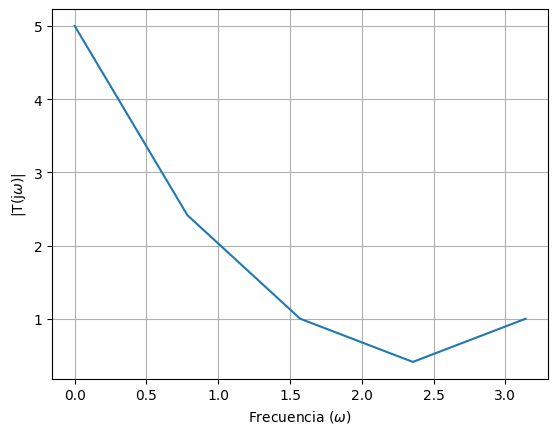

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Omega = np.array([
    0,              
    np.pi / 4,       
    np.pi / 2,      
    3 * np.pi / 4,   
    np.pi            
])

modulo = [5, 1+np.sqrt(2), 1, 0.41, 1]

plt.figure()
plt.plot(Omega, modulo) 
plt.xlabel('Frecuencia ($\omega$)')
plt.ylabel('|T(j$\omega$)|')
plt.grid(True)
plt.show()

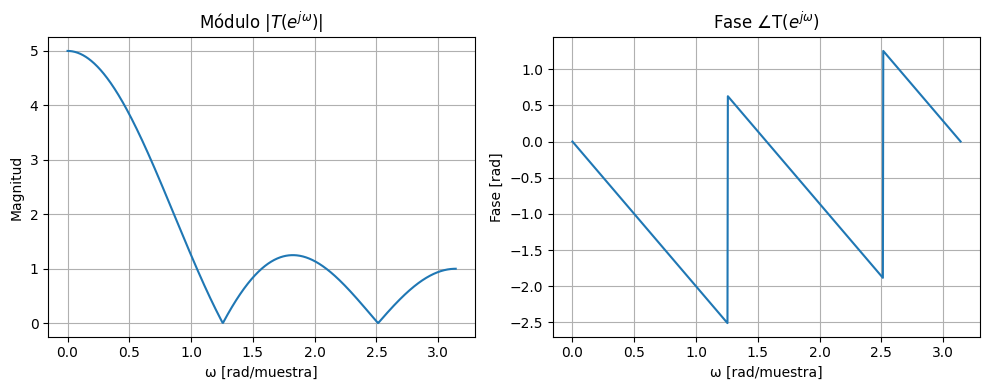

In [17]:
w = np.linspace(0, np.pi, 1000)   
H = np.exp(-2j*w) * (1+2*np.cos(w)+2*np.cos(2*w))     

mod = np.abs(H)
phase = np.angle(H)              

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(w, mod)
plt.title('Módulo |$T(e^{j\omega})$|')
plt.xlabel('ω [rad/muestra]')
plt.ylabel('Magnitud')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(w, phase)
plt.title('Fase ∠T($e^{j\omega})$')
plt.xlabel('ω [rad/muestra]')
plt.ylabel('Fase [rad]')
plt.grid(True)

plt.tight_layout()
plt.show()

**Sistema 4:** Se procede de igual manera que en los sistemas anteriores. 
Luego de aplicar la transformada Z, la ecuación quedará como
$$Y(Z) = X(Z)-Z^{-2}\cdot X(Z) = X(Z)\cdot(1-Z^{-2})$$
A partir de cual se puede despejar la Función Transferencia:
$$T(Z)=\frac{Y(Z)}{X(Z)}=1-Z^{-2}$$
y multiplicando y diviendo por el término de mayor orden pero con signo positivo, 
$$T(Z)=1-Z^{-2}=1-Z^{-2}\cdot\frac{z²}{z²} = \frac{z²-1}{z²}$$

Se procede a calcular la respuesta en frecuencia de módulo y fase, llevando a cabo el procedimiento anterior. 
Se evalúa la función transferencia en $Z=1e^{j\Omega}$, obteniendo $T(j\Omega)=e^{j\Omega}-e^{-2j\Omega}$ y sacando factor comun, se tiene $T(j\Omega) = e^{-j\Omega}\cdot(e^{j\Omega}-e^{-j\Omega})$.
En este caso se buscará usar la identidad de Euler que define el seno como $\sin{\Omega}=\frac{e^{j\Omega} - e^{-j\Omega}}{2j}$ $(ec.X)$, luego $2j\sin{\Omega}=e^{j\Omega} - e^{-j\Omega}$. 

Se obtiene la siguiente expresión:
$$T(j\Omega) = e^{-j\Omega}\cdot{2j\sin{\Omega}}$$

Se calcula entonces
- Respuesta en Frecuencia de módulo:
  Se toma módulo a la expresión algebraica: 
  $$|T(j\Omega)| = \underbrace{|e^{-j\Omega}|}_{=1}\cdot|{2j\sin{\Omega}}|$$
  Esta expresión se evaluará en diferentes frecuencias $\Omega$, para poder obtener un comportamiento aproximado del sistema. Se elijen 5 puntos entre 0 y Nyquist:
  - $\Omega=0 \rightarrow |T(j0)|= |2j\sin{(0)}| = 0$
  - $\Omega=\frac{\pi}{4} \rightarrow |T(j\frac{\pi}{4})|= |2j\sin{(\frac{\pi}{4})}| = \sqrt{2} \approx 1,41$
  - $\Omega=\frac{\pi}{2} \rightarrow |T(j\frac{\pi}{2})|= |2j\sin{(\frac{\pi}{2})}| = 2$
  - $\Omega=\frac{3\pi}{4} \rightarrow |T(j\frac{3\pi}{4})|= |2j\sin{(\frac{3\pi}{4})}| = \sqrt{2} \approx 1,41$
  - $\Omega=\pi \rightarrow |T(j\pi)|= |2j\sin{(\pi)}| = 0$
  

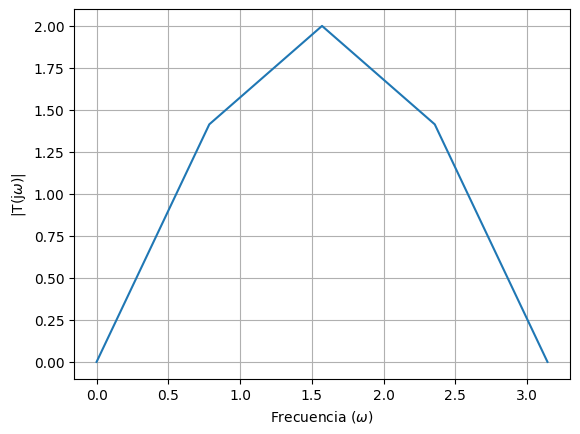

In [6]:
Omega_4 = np.array([
    0,              
    np.pi / 4,       
    np.pi / 2,      
    3 * np.pi / 4,   
    np.pi            
])

modulo_4 = [0, np.sqrt(2), 2, np.sqrt(2), 0]

plt.figure()
plt.plot(Omega_4, modulo_4) 
plt.xlabel('Frecuencia ($\omega$)')
plt.ylabel('|T(j$\omega$)|')
plt.grid(True)
plt.show()

Se simula y valida la respuesta utilizando las funciones de numpy *abs* y *phase*

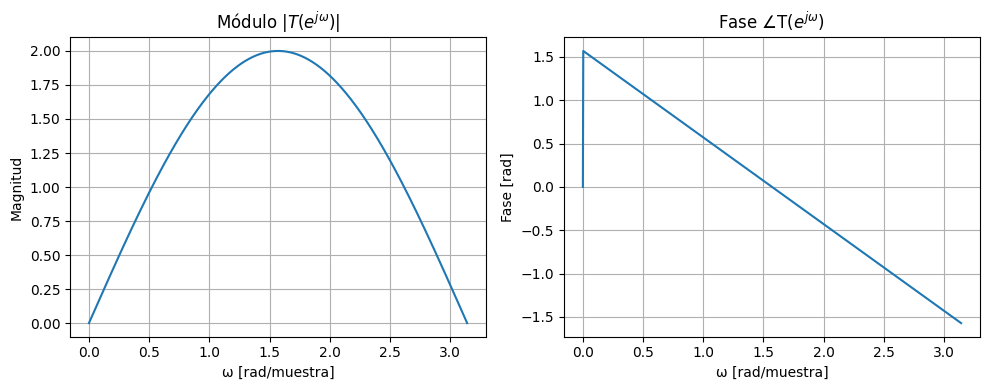

In [15]:
w = np.linspace(0, np.pi, 1000)   
H = np.exp(-1j*w) * 2j * np.sin(w)         

mod = np.abs(H)
phase = np.angle(H)              

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(w, mod)
plt.title('Módulo |$T(e^{j\omega})$|')
plt.xlabel('ω [rad/muestra]')
plt.ylabel('Magnitud')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(w, phase)
plt.title('Fase ∠T($e^{j\omega})$')
plt.xlabel('ω [rad/muestra]')
plt.ylabel('Fase [rad]')
plt.grid(True)

plt.tight_layout()
plt.show()